In [ ]:
# !pip install pandas

In [8]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import joblib
from matplotlib.colors import ListedColormap
plt.style.use("fivethirtyeight")##<optional step

In [9]:
class Perceptron:
    def __init__(self,eta:float=None,epochs:int=None):
        self.weights =np.random.randn(3)*1e-4 # small random weights
        is_training = (eta is not None) and (epochs is not None)
        if is_training:
            print(f"inital weights before training: \n{self.weights}")
        self.eta= eta
        self.epochs = epochs
    #internal function
    def _z_outcome(self,inputs,weights):
        return np.dot(inputs,weights)
        
    def activation_function(self,z):
        return np.where(z>0,1,0)
    
    def fit(self,X,y):
        self.X = X
        self.y = y
        X_with_bias = np.c_[self.X,-np.ones((len(self.X),1))]
        print(f"X with baise: \n{X_with_bias}")
        for epoch in range(self.epochs):
            print(f"for epoch >> {epoch}")
            z= self._z_outcome(X_with_bias,self.weights)
            y_hat = self.activation_function(z)
            print(f"predicted value after forward pass: \n {y_hat}")
            self.error = self.y - y_hat
            print(f"erro: \n {self.error}"  )
            self.weights = self.weights + self.eta * np.dot(X_with_bias.T, self.error)
            print(f"updated weights after epoch: {epoch}/{self.epochs}: \n {self.weights}")
            print("##"*10)
            
        
    def predict(self,test_X):
        test_X_with_bais = np.c_[test_X,-np.ones((len(test_X),1))]
        z=self._z_outcome(test_X_with_bais,self.weights)     
        return self.activation_function(z)
        
    def total_loss(self):
        total_loss = np.sum(self.error)
        print(f"\n total loss: {total_loss}\n")
        return total_loss
    
    def _create_dir_return_path(self,model_dir,filename):
        os.makedirs(model_dir,exist_ok=True)
        return os.path.join(model_dir,filename)
    
    def save(self,filename,model_dir=None):
        if model_dir is not None:
            model_file_path = self._create_dir_return_path(model_dir,filename)
            joblib.dump(self,model_file_path)
        else:
            model_file_path = self._create_dir_return_path("model",filename)
            joblib.dump(self,model_file_path)
            
    def load(self,filepath):
        return joblib.load(filepath)
    

In [10]:
def prepare_data(df,target_col='y'):
    X= df.drop(target_col,axis=1)
    y=df[target_col]
    return X,y

In [11]:
AND ={
    "x1":[0,0,1,1],
    "x2":[0,1,0,1],
    "y":[0,0,0,1]
}

In [12]:
df_AND=pd.DataFrame(AND)

In [13]:
df_AND

,x1,x2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


In [14]:
X,y = prepare_data(df_AND)
ETA = 0.1 # 0 and 1
EPOCHS = 10

model_and = Perceptron(eta=ETA,epochs=EPOCHS)
model_and.fit(X,y)

_=model_and.total_loss()

inital weights before training: 
[ 4.75894103e-05  2.19066723e-05 -1.92782199e-05]
X with baise: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
for epoch >> 0
predicted value after forward pass: 
 [1 1 1 1]
erro: 
 0   -1
1   -1
2   -1
3    0
Name: y, dtype: int64
updated weights after epoch: 0/10: 
 [-0.09995241 -0.09997809  0.29998072]
####################
for epoch >> 1
predicted value after forward pass: 
 [0 0 0 0]
erro: 
 0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated weights after epoch: 1/10: 
 [4.75894103e-05 2.19066723e-05 1.99980722e-01]
####################
for epoch >> 2
predicted value after forward pass: 
 [0 0 0 0]
erro: 
 0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated weights after epoch: 2/10: 
 [0.10004759 0.10002191 0.09998072]
####################
for epoch >> 3
predicted value after forward pass: 
 [0 1 1 1]
erro: 
 0    0
1   -1
2   -1
3    0
Name: y, dtype: int64
updated weights after epoch: 3/10: 
 [4.75894103e-05 2.19066723

In [15]:
model_and.save(filename='and.model')

In [16]:
reload_model_and =Perceptron().load(filepath="model/and.model")

In [17]:
reload_model_and.predict(test_X=[[1,0]])

array([0])

In [18]:
OR ={
    "x1":[0,0,1,1],
    "x2":[0,1,0,1],
    "y":[0,1,1,1]
}
df_OR=pd.DataFrame(OR)
df_OR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


In [19]:
X,y = prepare_data(df_OR)
ETA = 0.1 # 0 and 1
EPOCHS = 10

model_OR = Perceptron(eta=ETA,epochs=EPOCHS)
model_OR.fit(X,y)

_=model_OR.total_loss()

inital weights before training: 
[-2.52868856e-05 -1.52074287e-04 -4.91478150e-05]
X with baise: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
for epoch >> 0
predicted value after forward pass: 
 [1 0 1 0]
erro: 
 0   -1
1    1
2    0
3    1
Name: y, dtype: int64
updated weights after epoch: 0/10: 
 [ 0.09997471  0.19984793 -0.10004915]
####################
for epoch >> 1
predicted value after forward pass: 
 [1 1 1 1]
erro: 
 0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights after epoch: 1/10: 
 [ 9.99747131e-02  1.99847926e-01 -4.91478150e-05]
####################
for epoch >> 2
predicted value after forward pass: 
 [1 1 1 1]
erro: 
 0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights after epoch: 2/10: 
 [0.09997471 0.19984793 0.09995085]
####################
for epoch >> 3
predicted value after forward pass: 
 [0 1 1 1]
erro: 
 0    0
1    0
2    0
3    0
Name: y, dtype: int64
updated weights after epoch: 3/10: 
 [0.09997471 0.19984793 

In [20]:
XOR ={
    "x1":[0,0,1,1],
    "x2":[0,1,0,1],
    "y":[0,1,1,0]
}
df_XOR=pd.DataFrame(XOR)
df_XOR

X,y = prepare_data(df_XOR)
ETA = 0.1 # 0 and 1
EPOCHS = 20

model_XOR = Perceptron(eta=ETA,epochs=EPOCHS)
model_XOR.fit(X,y)

_=model_XOR.total_loss()

inital weights before training: 
[-5.34911328e-05 -2.93363021e-05 -6.05077459e-05]
X with baise: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
for epoch >> 0
predicted value after forward pass: 
 [1 1 1 0]
erro: 
 0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights after epoch: 0/20: 
 [-5.34911328e-05 -2.93363021e-05  9.99394923e-02]
####################
for epoch >> 1
predicted value after forward pass: 
 [0 0 0 0]
erro: 
 0    0
1    1
2    1
3    0
Name: y, dtype: int64
updated weights after epoch: 1/20: 
 [ 0.09994651  0.09997066 -0.10006051]
####################
for epoch >> 2
predicted value after forward pass: 
 [1 1 1 1]
erro: 
 0   -1
1    0
2    0
3   -1
Name: y, dtype: int64
updated weights after epoch: 2/20: 
 [-5.34911328e-05 -2.93363021e-05  9.99394923e-02]
####################
for epoch >> 3
predicted value after forward pass: 
 [0 0 0 0]
erro: 
 0    0
1    1
2    1
3    0
Name: y, dtype: int64
updated weights after epoch: 3/20: 
 [ 0.0999

In [21]:
# Perceptrons works good for linearly separable dataset

In [39]:
def save_plot(df,model,plot_dir = "plots",filename="plot.png"):
    def _create_base_plot(df):
        df.plot(kind="scatter",x="x1",y='x2',c="y",s=100,cmap="coolwarm")
        plt.axhline(y=0,color="black",linestyle = "--",linewidth=1)
        plt.axvline(x=0,color="black",linestyle = "--",linewidth=1)
        
        figure =plt.gcf()
        figure.set_size_inches(10,8)
        
    def _plot_decision_region(X, y, classifier,resolution=0.2):
        colors = ("cyan","lightgreen")
        cmap  = ListedColormap(colors)
        
        X= X.values #as an array
        x1 = X[:,0]
        x2 = X[:,1]
  
        
        x1_min, x1_max = x1.min()-1, x1.max()+1
        x2_min, x2_max = x2.min()-1, x2.max()+1
        
        xx1, xx2 = np.meshgrid(np.arange(x1_min,x1_max, resolution),
                               np.arange(x2_min,x2_max, resolution)
                              )
        y_hat = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
        y_hat = y_hat.reshape(xx1.shape)
        
        plt.contourf(xx1,xx2,y_hat,alpha=0.3,cmap=cmap)
        plt.xlim(xx1.min(),xx1.max())
        plt.ylim(xx2.min(),xx2.max())
        
        plt.plot()
    
    X,y = prepare_data(df)
    _create_base_plot(df)
    _plot_decision_region(X,y,model)
    
    os.makedirs(plot_dir,exist_ok=True)
    plot_path =os.path.join(plot_dir,filename)
    plt.savefig(plot_path)
    

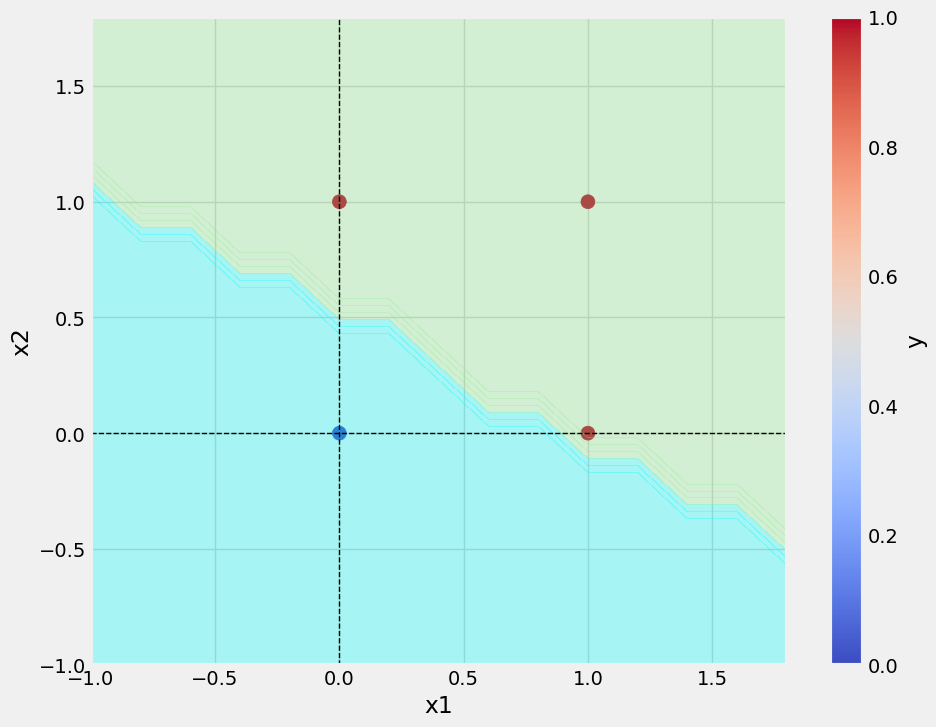

In [40]:
save_plot(df_OR,model_OR,filename="plot.png")

In [26]:
df_OR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1
